In [2]:
from lib.datasources import *
from lib.characterization import *
from lib.analytics import *

# Population the Complex Networks Data Base

In [3]:
loader_configs = {
    'base_folder': 'data', 
    'random_seed': 123, 
    'loader_mode': 'full'
}
SyntheticNetworks.setup(**loader_configs)
KeggMetabolicNetworks.setup(**loader_configs)

In [4]:
datapool = DataPool()
datapool.persist_fetched = False
datapool.update(n=SyntheticNetworks.all(samples_per_label=5))
datapool.update(n=KeggMetabolicNetworks.all(samples_per_label=5))


synthetic:classic


[watts-strogatz]              : 100%|█████████████| 5/5 [00:01<00:00,  3.62it/s]



synthetic:scalefree


[scale-free nlin (2.0)]       : 100%|█████████████| 5/5 [00:00<00:00, 15.56it/s]



synthetic:noise=10


[watts-strogatz]              : 100%|█████████████| 5/5 [00:00<00:00,  8.67it/s]



synthetic:noise=20


[watts-strogatz]              : 100%|█████████████| 5/5 [00:00<00:00,  7.06it/s]



synthetic:noise=30


[watts-strogatz]              : 100%|█████████████| 5/5 [00:00<00:00,  8.11it/s]



kegg-metabolic:actinobacteria


[Streptomyces]                : 100%|████████████| 5/5 [00:00<00:00, 235.66it/s]



kegg-metabolic:firmicutes-bacillis


[Streptococcus]               : 100%|████████████| 5/5 [00:00<00:00, 427.03it/s]



kegg-metabolic:protist


[Stramenopiles]               : 100%|████████████| 5/5 [00:00<00:00, 303.13it/s]



kegg-metabolic:fungi


[sordariomycetes]             : 100%|████████████| 5/5 [00:00<00:00, 232.07it/s]



kegg-metabolic:plant


[monocots]                    : 100%|████████████| 5/5 [00:00<00:00, 274.65it/s]



kegg-metabolic:animals


[mammals]                     : 100%|████████████| 5/5 [00:00<00:00, 159.33it/s]



kegg-metabolic:kingdom


[protist]                     : 100%|████████████| 5/5 [00:00<00:00, 359.10it/s]


In [5]:
datapool.networks

,collection,dataset,label,N,M,K,abbr,graph,source
network_id,,,,,,,,,
0,synthetic,classic,barabasi-albert,1000,7964,16.00,"BA(N=1000, K=16)_#84",<lib.containers.GraphAPI object at 0x7fa1af7c1...,data/synthetic/classic/BA/BA_n=1000_k=16_i=84.txt
1,synthetic,classic,barabasi-albert,2000,9985,10.00,"BA(N=2000, K=10)_#72",<lib.containers.GraphAPI object at 0x7fa1af7c1...,data/synthetic/classic/BA/BA_n=2000_k=10_i=72.txt
2,synthetic,classic,barabasi-albert,2000,13972,14.00,"BA(N=2000, K=14)_#24",<lib.containers.GraphAPI object at 0x7fa1af7c1...,data/synthetic/classic/BA/BA_n=2000_k=14_i=24.txt
3,synthetic,classic,barabasi-albert,2000,15964,16.00,"BA(N=2000, K=16)_#25",<lib.containers.GraphAPI object at 0x7fa1af7c1...,data/synthetic/classic/BA/BA_n=2000_k=16_i=25.txt
4,synthetic,classic,barabasi-albert,500,2979,12.00,"BA(N=500, K=12)_#98",<lib.containers.GraphAPI object at 0x7fa1af7c1...,data/synthetic/classic/BA/BA_n=500_k=12_i=98.txt
...,...,...,...,...,...,...,...,...,...
290,kegg-metabolic,kingdom,protist,472,1406,2.98,KingdProti:cho,<lib.containers.GraphAPI object at 0x7fa1af0d8...,data/kegg-metabolic/kingdom/graphs/protist_cho...
291,kegg-metabolic,kingdom,protist,1235,4045,3.28,KingdProti:dfa,<lib.containers.GraphAPI object at 0x7fa1af3de...,data/kegg-metabolic/kingdom/graphs/protist_dfa...
292,kegg-metabolic,kingdom,protist,925,2971,3.21,KingdProti:lma,<lib.containers.GraphAPI object at 0x7fa1af0d8...,data/kegg-metabolic/kingdom/graphs/protist_lma...


In [6]:
datapool.update(m=Distances.as_dataframe())
datapool.update(m=Connectivity.as_dataframe())
datapool.update(m=ClusteringAndCycles.as_dataframe())
datapool.update(m=EntropyAndEnergy.as_dataframe())
datapool.update(m=Centrality.as_dataframe())
datapool.update(m=SpectralAnalysis.as_dataframe())
datapool.update(m=Walks.as_dataframe())
datapool.update(m=Automata.as_dataframe())

In [10]:
for automaton in ['tstna', 'llna']:
    # automaton itself
    idx = (datapool.measures['varname']==f'{automaton}_teps').argmax()
    datapool.measures.loc[idx, 'default'].update({'num_steps': 50})
    # network descriptors
    idx = (datapool.measures['varname']==f'{automaton}_hist').argmax()
    datapool.measures.loc[idx, 'default'].update({
        'extractors': ['Es', 'BP_3', 'BP_5'], 
        'resolution': {'Es':[10,20], 'BP_3':8, 'BP_5':32},
        'BP_5': {'digits':5},
        'BP_7': {'digits':7}
    })

In [11]:
cols = [ c for c in datapool.measures.columns if c not in ['varname', 'function'] ]
datapool.measures[cols]

,name,symbol,scope,category,dependence,default
measure_id,,,,,,
0,shortest distances,d_ij,vertex pair,distances,None,None
1,shortest distances distribution,P(d_ij),distrib,distances,[shortest distances],None
2,diameter,D,graph,distances,[shortest distances distribution],None
3,average geodesic distance,l,graph,distances,[shortest distances distribution],None
4,global efficiency,E,graph,distances,[shortest distances distribution],None
5,harmonic mean of the geodesic distances,h,graph,distances,[global efficiency],None
6,vertex degree,k_i,vertex,connectivity,None,None
7,maximum degree,k_max,graph,connectivity,[vertex degree],None
8,degree distribution,P(k),distrib,connectivity,[vertex degree],None


In [12]:
datapool.save('cache/demo', n=True, m=True)

cache/demo/flags.dat saved in disk
cache/demo/networks.dat saved in disk
cache/demo/measures.dat saved in disk


In [13]:
m_mask = (
    (datapool.measures['name'] != 'shortest distances') & 
    ~(datapool.measures['category'].isin(['spectral analysis', 'walks']))
)
datapool.update(r=datapool.evaluate(measure_subset=m_mask, log_info=True))

Network 295/295: 100%|██████████████████████| 7670/7670 [41:36<00:00,  3.07it/s]


In [14]:
datapool.save('cache/demo', r=True, strict=True)

cache/demo/results.dat saved in disk


# Creating a Tabular Dataset Collection

In [5]:
from lib.analytics import *
from lib.characterization import *

In [6]:
datapool = DataPool()
datapool.load('cache/demo', n=True, m=True, r=True)

cache/demo/flags.dat loaded in memory
cache/demo/networks.dat loaded in memory
cache/demo/measures.dat loaded in memory
cache/demo/results.dat loaded in memory


In [7]:
m_mask = (
    (datapool.measures['category'].isin(['distances','entropy and energy','centrality'])) & 
    (datapool.measures['scope']=='graph')
)
dscoll1 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll1)

Y                                      \
            collection         dataset               label   
sample                                                       
165     kegg-metabolic  actinobacteria     Corynebacterium   
166     kegg-metabolic  actinobacteria     Corynebacterium   
167     kegg-metabolic  actinobacteria     Corynebacterium   
168     kegg-metabolic  actinobacteria     Corynebacterium   
169     kegg-metabolic  actinobacteria     Corynebacterium   
...                ...             ...                 ...   
40           synthetic       scalefree  dorogovtsev-mendes   
41           synthetic       scalefree  dorogovtsev-mendes   
42           synthetic       scalefree  dorogovtsev-mendes   
43           synthetic       scalefree  dorogovtsev-mendes   
44           synthetic       scalefree  dorogovtsev-mendes   

                               X                                             \
                    network diam avg_gdist     effic hmean_gdist p_deg_enrg   
sample                                                                        
165         ActinCoryn:camg    6  3.199388  0.332155    3.010642  11.375221   
166          ActinCoryn:cgm    6  3.259873  0.326548    3.062342  11.193398   
167          ActinCoryn:cod    6  3.193072   0.33293    3.003637  11.151356   
168          ActinCoryn:cpk    6  3.210487  0.331499      3.0166  11.112865   
169          ActinCoryn:cua    6  3.217767  0.330892    3.022134  10.964664   
...                     ...  ...       ...       ...         ...        ...   
40      DM(N=1000, K=8)_#22    6  3.235118  0.326901    3.059029  12.730058   
41      DM(N=1000, K=8)_#44    6  3.253142  0.324945    3.077443  12.753481   
42      DM(N=1000, K=8)_#61    5   3.21769  0.328232    3.046622  12.853621   
43      DM(N=1000, K=8)_#95    6  3.299178  0.320709     3.11809  12.544445   
44      DM(N=1000, K=8)_#96    6  3.212196  0.329204    3.037628   12.80847   

                                                          
       p_deg_entr q_deg_entr       avg_bc            cpd  
sample                                                    
165      2.259933   2.975835  1124.387476  168598.630624  
166      2.287669   2.998323  1165.464597  155765.110178  
167      2.287944   2.976222   959.969143  104224.779559  
168      2.305382   2.986354   990.797991  111242.290751  
169       2.27661   2.947001   988.515152  117798.232611  
...           ...        ...          ...            ...  
40       2.281799   3.145872     1118.059  120375.901457  
41       2.318306    3.18579     1127.071   87201.281781  
42       2.276293   3.123434     1109.345   79109.795084  
43       2.297894   3.151015     1150.089   76872.393888  
44       2.267053   3.107836     1106.598  122739.932929  

[295 rows x 13 columns]

In [8]:
m_mask = (datapool.measures['varname'] == 'llna_hist')
dscoll2 = Report.make(datapool, measure_subset=m_mask, header='varname', expand=True, detail=True)
display(dscoll2)

Y                                      \
            collection         dataset               label   
sample                                                       
165     kegg-metabolic  actinobacteria     Corynebacterium   
166     kegg-metabolic  actinobacteria     Corynebacterium   
167     kegg-metabolic  actinobacteria     Corynebacterium   
168     kegg-metabolic  actinobacteria     Corynebacterium   
169     kegg-metabolic  actinobacteria     Corynebacterium   
...                ...             ...                 ...   
40           synthetic       scalefree  dorogovtsev-mendes   
41           synthetic       scalefree  dorogovtsev-mendes   
42           synthetic       scalefree  dorogovtsev-mendes   
43           synthetic       scalefree  dorogovtsev-mendes   
44           synthetic       scalefree  dorogovtsev-mendes   

                                                X                        \
                    network llna_hist:[Es,10]#001 llna_hist:[Es,10]#002   
sample                                                                    
165         ActinCoryn:camg              0.014677              0.001957   
166          ActinCoryn:cgm              0.020369              0.000970   
167          ActinCoryn:cod              0.011429              0.002286   
168          ActinCoryn:cpk              0.021205              0.001116   
169          ActinCoryn:cua              0.014590              0.001122   
...                     ...                   ...                   ...   
40      DM(N=1000, K=8)_#22              0.001000              0.000000   
41      DM(N=1000, K=8)_#44              0.000000              0.000000   
42      DM(N=1000, K=8)_#61              0.000000              0.000000   
43      DM(N=1000, K=8)_#95              0.000000              0.000000   
44      DM(N=1000, K=8)_#96              0.001000              0.000000   

                                                                          \
       llna_hist:[Es,10]#003 llna_hist:[Es,10]#004 llna_hist:[Es,10]#005   
sample                                                                     
165                 0.000978              0.000978              0.000978   
166                 0.001940              0.000970              0.000000   
167                 0.004571              0.000000              0.003429   
168                 0.004464              0.001116              0.003348   
169                 0.001122              0.002245              0.005612   
...                      ...                   ...                   ...   
40                  0.000000              0.000000              0.001000   
41                  0.000000              0.000000              0.001000   
42                  0.000000              0.000000              0.001000   
43                  0.000000              0.000000              0.000000   
44                  0.001000              0.000000              0.001000   

                              ...                               \
       llna_hist:[Es,10]#006  ... llna_hist:std([BP_5,32])#023   
sample                        ...                                
165                 0.000000  ...                     0.014503   
166                 0.000000  ...                     0.015423   
167                 0.001143  ...                     0.014395   
168                 0.000000  ...                     0.015845   
169                 0.002245  ...                     0.014703   
...                      ...  ...                          ...   
40                  0.000000  ...                     0.014301   
41                  0.000000  ...                     0.012086   
42                  0.001000  ...                     0.013136   
43                  0.002000  ...                     0.013918   
44                  0.000000  ...                     0.014063   

                                                                  \
       llna_hist:std([BP_5,32])#024 llna_hi

# Optimizing Classifiers

In [9]:
from lib.analytics import ModelSelector

import itertools as itt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import sklearn as skl

In [10]:
msel = ModelSelector([
    GaussianNB(),
    *[ KNeighborsClassifier(n_neighbors=2*k+1, weights='distance', n_jobs=4) for k in range(3) ],
    *[ DecisionTreeClassifier(
        criterion=crit, 
        max_depth=2*md+3, 
        min_samples_split=5
    ) for (crit, md) in itt.product(
        ['gini','entropy'],
        list(range(3))
    ) ],
    *[ SVC(kernel=krn, decision_function_shape='ovr') for krn in ['linear', 'rbf', 'sigmoid'] ],
    *[ SVC(kernel='poly', degree=deg+1, decision_function_shape='ovr') for deg in range(2,5) ],
    *[ MLPClassifier(
        hidden_layer_sizes=tuple([128]*n_layer), 
        activation=activ,
        solver='adam',
        learning_rate='adaptive',
        early_stopping=True
    ) for (activ, n_layer) in itt.product(
        ['relu','logistic'], 
        list(range(3))
    ) ]
])

In [11]:
list(enumerate(msel.classifiers))

[(0, GaussianNB()),
 (1, KNeighborsClassifier(n_jobs=4, n_neighbors=1, weights='distance')),
 (2, KNeighborsClassifier(n_jobs=4, n_neighbors=3, weights='distance')),
 (3, KNeighborsClassifier(n_jobs=4, weights='distance')),
 (4, DecisionTreeClassifier(max_depth=3, min_samples_split=5)),
 (5, DecisionTreeClassifier(max_depth=5, min_samples_split=5)),
 (6, DecisionTreeClassifier(max_depth=7, min_samples_split=5)),
 (7,
  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5)),
 (8,
  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)),
 (9,
  DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5)),
 (10, SVC(kernel='linear')),
 (11, SVC()),
 (12, SVC(kernel='sigmoid')),
 (13, SVC(kernel='poly')),
 (14, SVC(degree=4, kernel='poly')),
 (15, SVC(degree=5, kernel='poly')),
 (16,
  MLPClassifier(early_stopping=True, hidden_layer_sizes=(),
                learning_rate='adaptive')),
 (17,
  MLPClassifier(early_stopping=Tr

In [12]:
def unpack_data(dscoll, dsname):
    mask = (dscoll['Y','dataset'] == dsname)
    X = dscoll.loc[mask,'X'].values
    y = dscoll.loc[mask,'Y']['label'].values
    return (X, y)

experiments = {
    'structural measures': { name: unpack_data(dscoll1, name) for name in dscoll1['Y','dataset'].unique() },
    'automata descriptors': { name: unpack_data(dscoll2, name) for name in dscoll2['Y','dataset'].unique() }
}

for name in experiments:
    datasets = experiments[name]
    msel.run_experiment(name, datasets, folds=2, reps=3)

100%|█████████████████████████████████████████| 528/528 [00:51<00:00, 10.21it/s]


In [13]:
msel.compare('accuracy', sorting_score=True, top=5)

model info                          \
            experiment              classifier   
1  structural measures    KNeighborsClassifier   
2  structural measures    KNeighborsClassifier   
3  structural measures                     SVC   
4  structural measures    KNeighborsClassifier   
5  structural measures  DecisionTreeClassifier   

                                                                   \
                                              params global score   
1        n_jobs=4, n_neighbors=1, weights='distance'     0.756052   
2        n_jobs=4, n_neighbors=3, weights='distance'     0.719593   
3                                    kernel='linear'     0.717510   
4                       n_jobs=4, weights='distance'     0.696150   
5  criterion='entropy', max_depth=3, min_samples_...     0.679869   

        accuracy                                                               \
  actinobacteria animals classic firmicutes-bacillis fungi   kingdom noise=10   
1       0.866071    0.80    0.90            0.400000  0.30  0.900000    1.000   
2       0.866071    0.65    0.90            0.450000  0.30  0.750000    0.975   
3       0.866071    0.60    0.95            0.550000  0.35  0.950000    0.825   
4       0.794643    0.60    0.85            0.450000  0.35  0.700000    0.975   
5       0.687500    0.50    0.70            0.633333  0.50  0.566667    0.950   

                                                     
   noise=20  noise=30     plant   protist scalefree  
1  1.000000  1.000000  0.598214  0.350000  0.958333  
2  1.000000  0.950000  0.535714  0.300000  0.958333  
3  0.775000  0.800000  0.535714  0.450000  0.958333  
4  1.000000  0.950000  0.464286  0.300000  0.919872  
5  0.941667  0.841667  0.669643  0.366667  0.801282

In [14]:
for ds in msel.evaluation['dataset'].unique():
    display(msel.analyze(ds, by=['accuracy', 'balanced accuracy'], top=5, level=1))

dataset           experiment              model name  \
                                                                 
1  actinobacteria  structural measures    KNeighborsClassifier   
2  actinobacteria  structural measures    KNeighborsClassifier   
3  actinobacteria  structural measures                     SVC   
4  actinobacteria  structural measures    KNeighborsClassifier   
5  actinobacteria  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  0.866071  0.009781   
2        n_jobs=4, n_neighbors=3, weights='distance'  0.866071  0.009781   
3                                    kernel='linear'  0.866071  0.009781   
4                       n_jobs=4, weights='distance'  0.794643  0.088027   
5  criterion='entropy', max_depth=3, min_samples_...  0.687500  0.161210   

  balanced accuracy            
               mean       std  
1          0.888889  0.000000  
2          0.888889  0.000000  
3          0.888889  0.000000  
4          0.833333  0.060858  
5          0.712963  0.162605

dataset           experiment              model name  \
                                                          
1  animals  structural measures    KNeighborsClassifier   
2  animals  structural measures              GaussianNB   
3  animals  structural measures                     SVC   
4  animals  structural measures  DecisionTreeClassifier   
5  animals  structural measures  DecisionTreeClassifier   

                                  model params accuracy            \
                                                   mean       std   
1  n_jobs=4, n_neighbors=1, weights='distance'     0.80  0.109545   
2                                                  0.70  0.109545   
3                             kernel='sigmoid'     0.70  0.109545   
4             max_depth=3, min_samples_split=5     0.65  0.054772   
5             max_depth=5, min_samples_split=5     0.65  0.054772   

  balanced accuracy            
               mean       std  
1          0.812500  0.068465  
2          0.708333  0.045644  
3          0.708333  0.091287  
4          0.687500  0.068465  
5          0.687500  0.068465

dataset           experiment            model name  \
                                                        
1  classic  structural measures                   SVC   
2  classic  structural measures                   SVC   
3  classic  structural measures  KNeighborsClassifier   
4  classic  structural measures  KNeighborsClassifier   
5  classic  structural measures                   SVC   

                                  model params accuracy            \
                                                   mean       std   
1                              kernel='linear'     0.95  0.054772   
2                             kernel='sigmoid'     0.95  0.054772   
3  n_jobs=4, n_neighbors=1, weights='distance'     0.90  0.000000   
4  n_jobs=4, n_neighbors=3, weights='distance'     0.90  0.000000   
5                                                  0.90  0.000000   

  balanced accuracy            
               mean       std  
1          0.958333  0.045644  
2          0.958333  0.045644  
3          0.895833  0.022822  
4          0.895833  0.022822  
5          0.895833  0.022822

dataset           experiment              model name  \
                                                                      
1  firmicutes-bacillis  structural measures  DecisionTreeClassifier   
2  firmicutes-bacillis  structural measures  DecisionTreeClassifier   
3  firmicutes-bacillis  structural measures                     SVC   
4  firmicutes-bacillis  structural measures  DecisionTreeClassifier   
5  firmicutes-bacillis  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1  criterion='entropy', max_depth=3, min_samples_...  0.633333  0.103280   
2                   max_depth=7, min_samples_split=5  0.616667  0.132916   
3                                   kernel='sigmoid'  0.600000  0.109545   
4  criterion='entropy', max_depth=7, min_samples_...  0.583333  0.132916   
5                   max_depth=3, min_samples_split=5  0.583333  0.132916   

  balanced accuracy            
               mean       std  
1          0.666667  0.129099  
2          0.645833  0.166145  
3          0.625000  0.091287  
4          0.611111  0.155158  
5          0.611111  0.155158

dataset            experiment              model name  \
                                                          
1   fungi  automata descriptors    KNeighborsClassifier   
2   fungi   structural measures  DecisionTreeClassifier   
3   fungi   structural measures  DecisionTreeClassifier   
4   fungi  automata descriptors    KNeighborsClassifier   
5   fungi   structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  0.550000  0.164317   
2  criterion='entropy', max_depth=3, min_samples_...  0.500000  0.109545   
3  criterion='entropy', max_depth=7, min_samples_...  0.500000  0.126491   
4                       n_jobs=4, weights='distance'  0.500000  0.000000   
5  criterion='entropy', max_depth=5, min_samples_...  0.483333  0.075277   

  balanced accuracy            
               mean       std  
1          0.541667  0.136931  
2          0.500000  0.136931  
3          0.500000  0.158114  
4          0.479167  0.022822  
5          0.479167  0.094097

dataset           experiment            model name  \
                                                        
1  kingdom  structural measures                   SVC   
2  kingdom  structural measures  KNeighborsClassifier   
3  kingdom  structural measures                   SVC   
4  kingdom  structural measures                   SVC   
5  kingdom  structural measures  KNeighborsClassifier   

                                  model params accuracy            \
                                                   mean       std   
1                              kernel='linear'     0.95  0.054772   
2  n_jobs=4, n_neighbors=1, weights='distance'     0.90  0.109545   
3                             kernel='sigmoid'     0.80  0.000000   
4                                                  0.80  0.000000   
5  n_jobs=4, n_neighbors=3, weights='distance'     0.75  0.164317   

  balanced accuracy                
               mean           std  
1          0.958333  4.564355e-02  
2          0.916667  9.128709e-02  
3          0.833333  8.599751e-17  
4          0.812500  2.282177e-02  
5          0.791667  1.369306e-01

dataset           experiment              model name  \
                                                           
1  noise=10  structural measures    KNeighborsClassifier   
2  noise=10  structural measures    KNeighborsClassifier   
3  noise=10  structural measures    KNeighborsClassifier   
4  noise=10  structural measures  DecisionTreeClassifier   
5  noise=10  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  1.000000  0.000000   
2        n_jobs=4, n_neighbors=3, weights='distance'  0.975000  0.027386   
3                       n_jobs=4, weights='distance'  0.975000  0.027386   
4  criterion='entropy', max_depth=3, min_samples_...  0.950000  0.054772   
5  criterion='entropy', max_depth=7, min_samples_...  0.916667  0.051640   

  balanced accuracy            
               mean       std  
1          1.000000  0.000000  
2          0.979167  0.022822  
3          0.979167  0.022822  
4          0.958333  0.045644  
5          0.930556  0.043033

dataset           experiment              model name  \
                                                           
1  noise=20  structural measures    KNeighborsClassifier   
2  noise=20  structural measures    KNeighborsClassifier   
3  noise=20  structural measures    KNeighborsClassifier   
4  noise=20  structural measures  DecisionTreeClassifier   
5  noise=20  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  1.000000  0.000000   
2        n_jobs=4, n_neighbors=3, weights='distance'  1.000000  0.000000   
3                       n_jobs=4, weights='distance'  1.000000  0.000000   
4  criterion='entropy', max_depth=5, min_samples_...  0.958333  0.049160   
5  criterion='entropy', max_depth=3, min_samples_...  0.941667  0.066458   

  balanced accuracy            
               mean       std  
1          1.000000  0.000000  
2          1.000000  0.000000  
3          1.000000  0.000000  
4          0.954861  0.053386  
5          0.951389  0.055382

dataset           experiment              model name  \
                                                           
1  noise=30  structural measures    KNeighborsClassifier   
2  noise=30  structural measures    KNeighborsClassifier   
3  noise=30  structural measures    KNeighborsClassifier   
4  noise=30  structural measures  DecisionTreeClassifier   
5  noise=30  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1        n_jobs=4, n_neighbors=1, weights='distance'  1.000000  0.000000   
2                       n_jobs=4, weights='distance'  0.950000  0.054772   
3        n_jobs=4, n_neighbors=3, weights='distance'  0.950000  0.000000   
4  criterion='entropy', max_depth=7, min_samples_...  0.841667  0.102062   
5  criterion='entropy', max_depth=3, min_samples_...  0.841667  0.086120   

  balanced accuracy            
               mean       std  
1          1.000000  0.000000  
2          0.958333  0.045644  
3          0.947917  0.011411  
4          0.864583  0.092936  
5          0.854167  0.095015

dataset           experiment              model name  \
                                                         
1   plant  structural measures  DecisionTreeClassifier   
2   plant  structural measures  DecisionTreeClassifier   
3   plant  structural measures  DecisionTreeClassifier   
4   plant  structural measures  DecisionTreeClassifier   
5   plant  structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                   max_depth=3, min_samples_split=5  0.741071  0.201636   
2                   max_depth=7, min_samples_split=5  0.693452  0.157068   
3  criterion='entropy', max_depth=3, min_samples_...  0.669643  0.048904   
4  criterion='entropy', max_depth=7, min_samples_...  0.669643  0.163955   
5                   max_depth=5, min_samples_split=5  0.669643  0.163955   

  balanced accuracy            
               mean       std  
1          0.750000  0.204124  
2          0.694444  0.163865  
3          0.666667  0.000000  
4          0.666667  0.182574  
5          0.666667  0.182574

dataset            experiment              model name  \
                                                           
1  protist  automata descriptors    KNeighborsClassifier   
2  protist   structural measures                     SVC   
3  protist   structural measures  DecisionTreeClassifier   
4  protist   structural measures  DecisionTreeClassifier   
5  protist   structural measures  DecisionTreeClassifier   

                                        model params  accuracy            \
                                                          mean       std   
1                       n_jobs=4, weights='distance'  0.450000  0.054772   
2                                    kernel='linear'  0.450000  0.164317   
3                   max_depth=7, min_samples_split=5  0.400000  0.109545   
4  criterion='entropy', max_depth=7, min_samples_...  0.383333  0.098319   
5  criterion='entropy', max_depth=3, min_samples_...  0.366667  0.121106   

  balanced accuracy            
               mean       std  
1          0.458333  0.000000  
2          0.458333  0.228218  
3          0.437500  0.159752  
4          0.416667  0.144338  
5          0.395833  0.172301

dataset           experiment            model name  \
                                                          
1  scalefree  structural measures  KNeighborsClassifier   
2  scalefree  structural measures  KNeighborsClassifier   
3  scalefree  structural measures                   SVC   
4  scalefree  structural measures            GaussianNB   
5  scalefree  structural measures  KNeighborsClassifier   

                                  model params  accuracy            \
                                                    mean       std   
1  n_jobs=4, n_neighbors=1, weights='distance'  0.958333  0.045644   
2  n_jobs=4, n_neighbors=3, weights='distance'  0.958333  0.045644   
3                              kernel='linear'  0.958333  0.045644   
4                                               0.919872  0.003511   
5                 n_jobs=4, weights='distance'  0.919872  0.003511   

  balanced accuracy                
               mean           std  
1          0.966667  3.651484e-02  
2          0.966667  3.651484e-02  
3          0.966667  3.651484e-02  
4          0.933333  8.599751e-17  
5          0.933333  8.599751e-17

In [15]:
mask = (
    (msel.evaluation['model name'] == 'DecisionTreeClassifier') &
    (msel.evaluation['dataset'] == 'classic')
)
msel.evaluation[mask].sort_values('accuracy', ascending=False).head(3)

,experiment,dataset,classifier,model name,model params,fold,repetition,fit time (s),prediction time (ms/sample),accuracy,balanced accuracy,precision micro,precision macro,recall micro,recall macro,f1 micro,f1 macro,confusion matrix
293,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=7, min_samples_...",1,3,0.001255,0.026155,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0,..."
285,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=3, min_samples_...",1,1,0.000667,0.014567,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0,..."
288,structural measures,classic,"DecisionTreeClassifier(criterion='entropy', ma...",DecisionTreeClassifier,"criterion='entropy', max_depth=5, min_samples_...",1,1,0.000663,0.014377,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"[[3, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0,..."


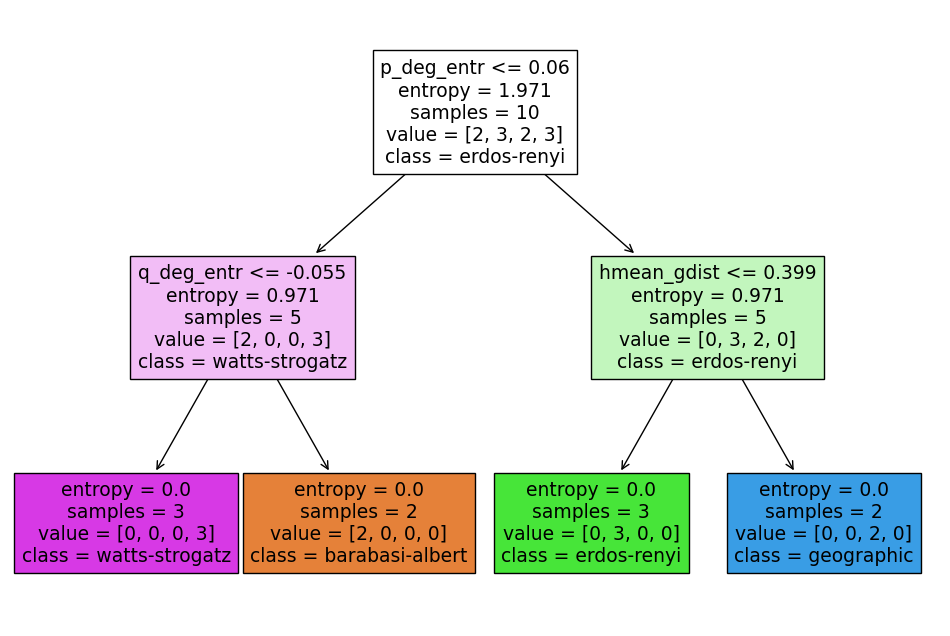

In [16]:
plt.figure(figsize=(12,8))
skl.tree.plot_tree(
    decision_tree=msel.evaluation.loc[293, 'classifier'], 
    feature_names=dscoll1['X'].columns, 
    class_names=dscoll1[ (dscoll1['Y','dataset'] == 'classic') ]['Y','label'].unique(),
    filled=True
)
plt.show()